In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import inspect
import os
from pathlib import Path

In [8]:
data_folder = Path("../data/processed")

In [9]:
def find_educational_attainment_correlation(characteristic_csv_filepath, edu_attainment_csv_filepath, truncation_index = False, education_standard = 'bachelors'):
    '''
    education_standard = 'bachelors' or 'masters' or 'higher_education'
    '''
    
    edu_attainment = pd.read_csv(edu_attainment_csv_filepath)
    characteristic = pd.read_csv(characteristic_csv_filepath)

    no_bachelors = edu_attainment["EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Bachelor's degree: Population 25 years and over -- (Estimate)"]
    no_masters = edu_attainment["EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Master's degree: Population 25 years and over -- (Estimate)"]
    no_higher_ed = no_masters + no_bachelors

    edu_population = edu_attainment[edu_attainment.columns[3]]
    char_population = characteristic[characteristic.columns[3]]

    if truncation_index == False:
        truncation_index = len(no_masters)

    if education_standard == 'bachelors':
        y = no_bachelors[0:truncation_index]
    if education_standard == 'masters':
        y = no_masters[0:truncation_index]
    else:
        y = no_higher_ed[0:truncation_index]

    correlations = []
    column_name = []


    for column in characteristic.columns[4:]:
        absolute_x = characteristic[column][0:truncation_index]
        fractional_x = absolute_x/char_population[0:truncation_index]
        correlations.append(np.corrcoef(absolute_x, y)[0][1])
        column_name.append(characteristic[column].name)

    df = pd.DataFrame(correlations, column_name, columns = ['correlation'])
    '''
    returns max correlating factor, all correlations,
    '''

    return df.sort_values('correlation', ascending = False)

In [10]:
poverty_file = data_folder / "X08_COMMUTING.csv"
education_file = data_folder / "X15_EDUCATIONAL_ATTAINMENT.csv"
correlations_df = find_educational_attainment_correlation(str(poverty_file), str(education_file), truncation_index = False, education_standard = 'higher_education')

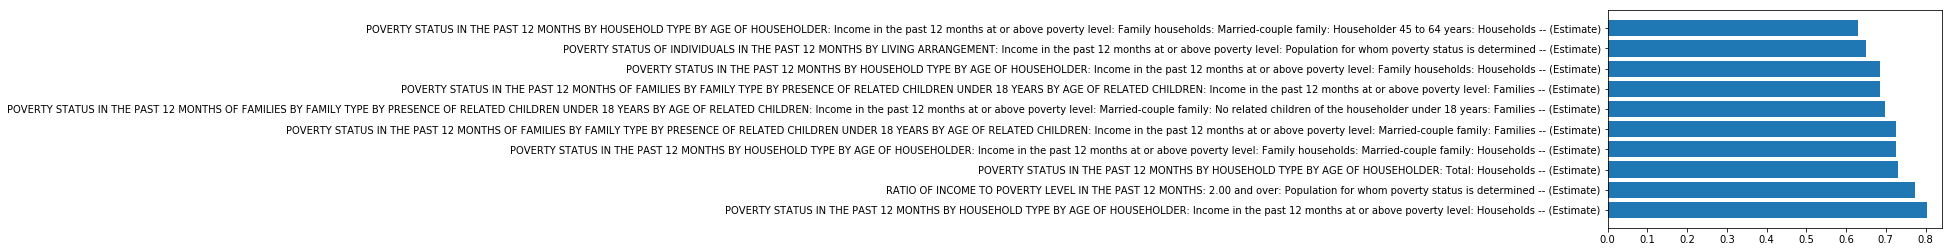

In [11]:
#print(correlations_df.index[:10])
plt.barh(correlations_df.index[:10], correlations_df["correlation"].values[:10])
#plt.xticks(rotation='vertical')
plt.show()

In [84]:
def drop_features_same_correlation(characteristic):
    x = characteristic[characteristic.columns[4]]
    
    ## loop through columns we care about and see if there is correlation
    for column in characteristic.columns[5:]:
        absolute_y = characteristic[column]
        correlation = np.corrcoef(x, absolute_y)[0][1]
        if correlation > 0.7:
            reduced_df = characteristic.drop(column, axis = 1)
            print("dropped column: {}".format(column))
            print(correlation)
    return reduced_df
    
    
    
education_fp = data_folder / "X15_EDUCATIONAL_ATTAINMENT.csv"    
edu_df = pd.read_csv(education_fp)
drop_features_same_correlation(edu_df)

dropped column: SEX BY EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Male: Population 25 years and over -- (Margin of Error)
0.8999399079851443
dropped column: SEX BY EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Female: Population 25 years and over -- (Margin of Error)
0.8762181726103889
dropped column: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Total: Population 25 years and over -- (Margin of Error)
0.9999999999999999
dropped column: EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Regular high school diploma: Population 25 years and over -- (Margin of Error)
0.700235109804291


,Unnamed: 0,Unnamed: 0.1,GEOID,SEX BY EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Total: Population 25 years and over -- (Estimate),SEX BY EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Total: Population 25 years and over -- (Margin of Error),SEX BY EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Male: Population 25 years and over -- (Estimate),SEX BY EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Male: Population 25 years and over -- (Margin of Error),SEX BY EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Male: No schooling completed: Population 25 years and over -- (Estimate),SEX BY EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Male: No schooling completed: Population 25 years and over -- (Margin of Error),SEX BY EDUCATIONAL ATTAINMENT FOR THE POPULATION 25 YEARS AND OVER: Male: Nursery to 4th grade: Population 25 years and over -- (Estimate),...,FIELD OF BACHELOR'S DEGREE FOR FIRST MAJOR THE POPULATION 25 YEARS AND OVER (HISPANIC OR LATINO): Science and Engineering: HISPANIC OR LATINO POPULATION 25 YEARS AND OVER WITH A BACHELOR'S DEGREE OR HIGHER ATTAINMENT -- (Margin of Error),FIELD OF BACHELOR'S DEGREE FOR FIRST MAJOR THE POPULATION 25 YEARS AND OVER (HISPANIC OR LATINO): Science and Engineering Related Fields: HISPANIC OR LATINO POPULATION 25 YEARS AND OVER WITH A BACHELOR'S DEGREE OR HIGHER ATTAINMENT -- (Estimate),FIELD OF BACHELOR'S DEGREE FOR FIRST MAJOR THE POPULATION 25 YEARS AND OVER (HISPANIC OR LATINO): Science and Engineering Related Fields: HISPANIC OR LATINO POPULATION 25 YEARS AND OVER WITH A BACHELOR'S DEGREE OR HIGHER ATTAINMENT -- (Margin of Error),FIELD OF BACHELOR'S DEGREE FOR FIRST MAJOR THE POPULATION 25 YEARS AND OVER (HISPANIC OR LATINO): Business: HISPANIC OR LATINO POPULATION 25 YEARS AND OVER WITH A BACHELOR'S DEGREE OR HIGHER ATTAINMENT -- (Estimate),FIELD OF BACHELOR'S DEGREE FOR FIRST MAJOR THE POPULATION 25 YEARS AND OVER (HISPANIC OR LATINO): Business: HISPANIC OR LATINO POPULATION 25 YEARS AND OVER WITH A BACHELOR'S DEGREE OR HIGHER ATTAINMENT -- (Margin of Error),FIELD OF BACHELOR'S DEGREE FOR FIRST MAJOR THE POPULATION 25 YEARS AND OVER (HISPANIC OR LATINO): Education: HISPANIC OR LATINO POPULATION 25 YEARS AND OVER WITH A BACHELOR'S DEGREE OR HIGHER ATTAINMENT -- (Estimate),FIELD OF BACHELOR'S DEGREE FOR FIRST MAJOR THE POPULATION 25 YEARS AND OVER (HISPANIC OR LATINO): Education: HISPANIC OR LATINO POPULATION 25 YEARS AND OVER WITH A BACHELOR'S DEGREE OR HIGHER ATTAINMENT -- (Margin of Error),"FIELD OF BACHELOR'S DEGREE FOR FIRST MAJOR THE POPULATION 25 YEARS AND OVER (HISPANIC OR LATINO): Arts, Humanities and Other: HISPANIC OR LATINO POPULATION 25 YEARS AND OVER WITH A BACHELOR'S DEGREE OR HIGHER ATTAINMENT -- (Estimate)","FIELD OF BACHELOR'S DEGREE FOR FIRST MAJOR THE POPULATION 25 YEARS AND OVER (HISPANIC OR LATINO): Arts, Humanities and Other: HISPANIC OR LATINO POPULATION 25 YEARS AND OVER WITH A BACHELOR'S DEGREE OR HIGHER ATTAINMENT -- (Margin of Error)",OBJECTID
0,0,0,15000US060014001001,2478,125,1274,109,0,12,9,...,24,0,12,0,12,0,12,0,12,3
1,1,1,15000US060014002001,843,79,427,54,0,12,0,...,22,7,11,6,9,0,12,26,22,4
2,2,2,15000US060014002002,716,82,313,52,0,12,0,...,16,0,12,0,12,0,12,13,19,5
3,3,3,15000US060014003001,973,329,501,189,0,12,0,...,21,0,12,0,12,0,12,13,25,6
4,4,4,15000US060014003002,1117,225,559,151,14,22,0,...,57,0,12,0,12,0,12,20,32,7
5,5,5,15000US060014003003,819,242,359,129,0,12,0,...,12,0,12,0,12,0,12,17,29,8
6,6,6,15000US060014003004,1215,230,434,109,0,12,0,...,12,0,12,0,12,0,12,11,23,9
7,7,7,15000US060014004001,1175,162,457,83,0,12,0,...,35,0,12,0,12,0,12,44,49,10
8,8,8,15000US060014004002,941,149,455,114,22,26,0,...,11,12,18,0,12,0,12,20,23,11
9,9,9,15000US060014004003,1187,197,590,179,0,12,0,...,25,8,13,0,12,0,12,0,12,12


                                                    Unnamed: 0  Unnamed: 0.1  \
Unnamed: 0                                            1.000000      1.000000   
Unnamed: 0.1                                          1.000000      1.000000   
UNWEIGHTED SAMPLE COUNT OF THE POPULATION: Tota...    0.026203      0.026203   
UNWEIGHTED SAMPLE COUNT OF THE POPULATION: Tota...         NaN           NaN   
UNWEIGHTED SAMPLE HOUSING UNITS: Total: Housing...    0.046733      0.046733   
UNWEIGHTED SAMPLE HOUSING UNITS: Total: Housing...         NaN           NaN   
OBJECTID                                              1.000000      1.000000   

                                                    UNWEIGHTED SAMPLE COUNT OF THE POPULATION: Total: Total population -- (Estimate)  \
Unnamed: 0                                                                                   0.026203                                  
Unnamed: 0.1                                                                           

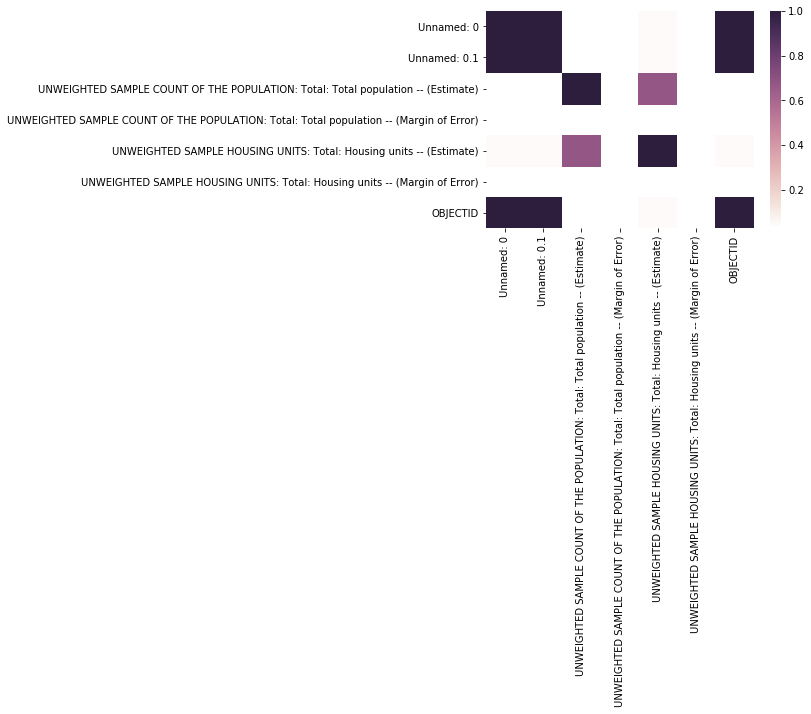

In [83]:
import seaborn as sns
c_fp = data_folder / "X00_COUNTS.csv"    
c_df = pd.read_csv(c_fp)
corr = c_df.corr()
print(corr)
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
#print(corr.columns)
sns.heatmap(corr, cmap=cmap,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

X02_RACE.csv
X99_IMPUTATION.csv
X00_COUNTS.csv
X20_EARNINGS.csv
X01_AGE_AND_SEX.csv
X03_HISPANIC_OR_LATINO_ORIGIN.csv
X21_VETERAN_STATUS.csv
X17_POVERTY.csv
X12_MARITAL_STATUS_AND_HISTORY.csv
X16_LANGUAGE_SPOKEN_AT_HOME.csv
X22_FOOD_STAMPS.csv
X08_COMMUTING.csv
X09_CHILDREN_HOUSEHOLD_RELATIONSHIP.csv
X27_HEALTH_INSURANCE.csv
X11_HOUSEHOLD_FAMILY_SUBFAMILIES.csv
BG_METADATA_2016.csv
X19_INCOME.csv
X23_EMPLOYMENT_STATUS.csv
X14_SCHOOL_ENROLLMENT.csv
X15_EDUCATIONAL_ATTAINMENT.csv
X07_MIGRATION.csv


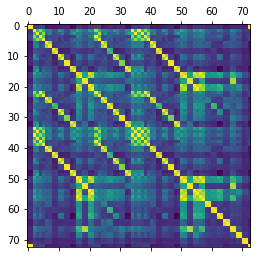

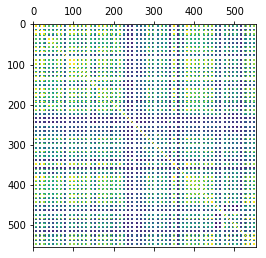

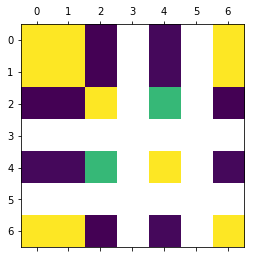

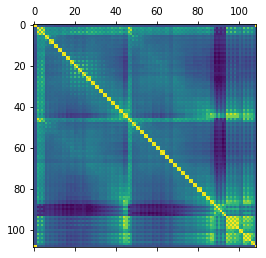

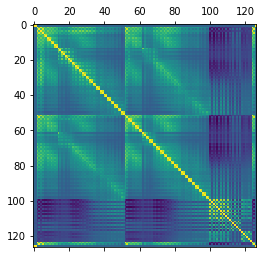

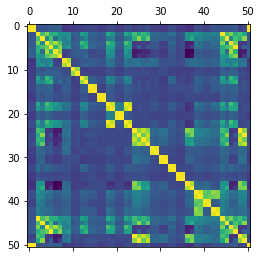

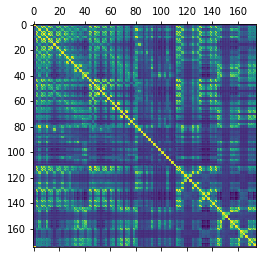

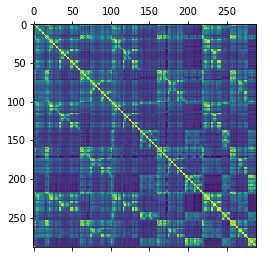

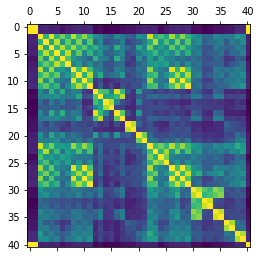

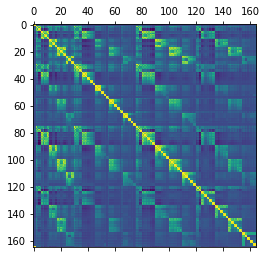

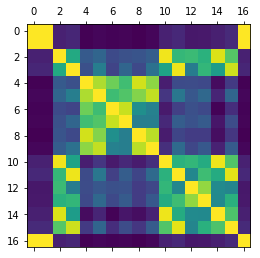

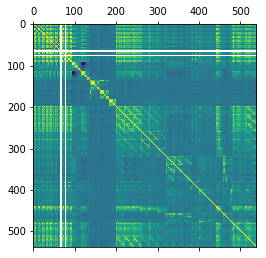

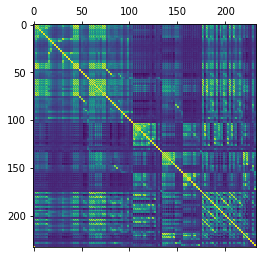

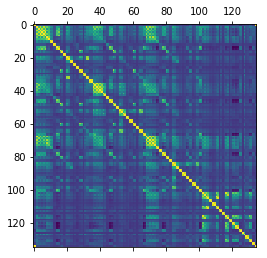

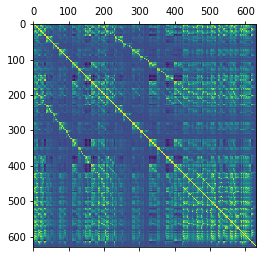

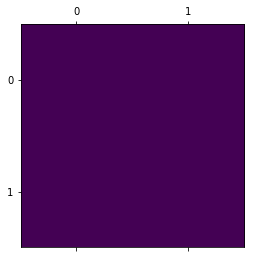

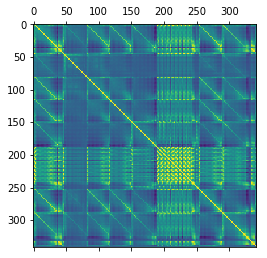

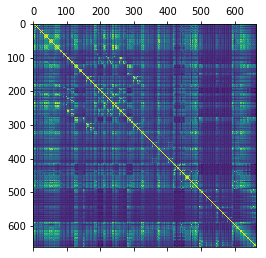

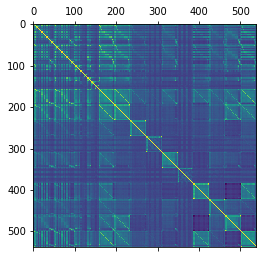

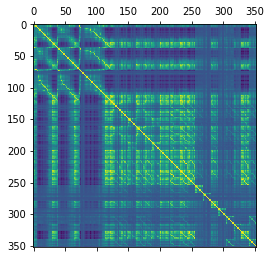

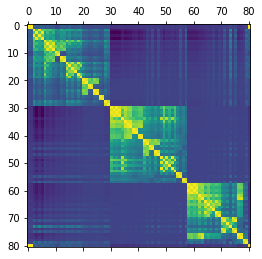

In [59]:
## Takes a loooong time to run
for f in os.listdir(str(data_folder)):
    df = pd.read_csv(data_folder/f)
    print(f)
    plt.matshow(df.corr())